In [1]:
import pm4py
import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 200)


In [2]:
file_path = '../../../data/BPI Challenge 2017.xes'
event_log = pm4py.read_xes(file_path)

/home/michelkunkler/.local/share/virtualenvs/TaskExecutionTimeMining--mAzMuWa/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [3]:
event_log

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [4]:
#event_log['concept'] = event_log['concept:name'] + '_' + event_log['lifecycle:transition']
#event_log = event_log[event_log['concept:name'].str.startswith('W_')]

In [5]:
#event_log[:99999].to_csv('test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
event_log['lifecycle:transition'].unique()

array(['complete', 'schedule', 'withdraw', 'start', 'suspend',
       'ate_abort', 'resume'], dtype=object)

In [7]:
event_log['concept:name'].unique()

array(['A_Create Application', 'A_Submitted', 'W_Handle leads',
       'W_Complete application', 'A_Concept', 'A_Accepted',
       'O_Create Offer', 'O_Created', 'O_Sent (mail and online)',
       'W_Call after offers', 'A_Complete', 'W_Validate application',
       'A_Validating', 'O_Returned', 'W_Call incomplete files',
       'A_Incomplete', 'O_Accepted', 'A_Pending', 'A_Denied', 'O_Refused',
       'O_Cancelled', 'A_Cancelled', 'O_Sent (online only)',
       'W_Assess potential fraud', 'W_Personal Loan collection',
       'W_Shortened completion '], dtype=object)

In [8]:
start_end_event_log = TransformEventLog.start_end_event_log_mult(event_log,
                                                                   start_name_1 = 'start',
                                                                   #start_name_2 = 'resume',
                                                                   #complete_name_3 = 'suspend',
                                                                   complete_name_1 = 'complete', complete_name_2 = 'ate_abort')

/home/michelkunkler/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log[timestamp_name + complete_name_gen] - start_end_event_log[timestamp_name + start_name_gen]
/home/michelkunkler/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [9]:
start_end_event_log.groupby(['lifecycle:transition_start', 'lifecycle:transition_complete']).count()

Action_start  \
lifecycle:transition_start lifecycle:transition_complete                 
start                      ate_abort                             85578   
                           complete                              42521   

                                                          org:resource_start  \
lifecycle:transition_start lifecycle:transition_complete                       
start                      ate_abort                                   85578   
                           complete                                    42521   

                                                          concept:name  \
lifecycle:transition_start lifecycle:transition_complete                 
start                      ate_abort                             85578   
                           complete                              42521   

                                                          EventOrigin_start  \
lifecycle:transition_start lifecycle:transition_complete                      
start                      ate_abort                                  85578   
                           complete                                   42521   

                                                          EventID_start  \
lifecycle:transition_start lifecycle:transition_complete                  
start                      ate_abort                              85578   
                           complete                               42521   

                                                          time:timestamp_start  \
lifecycle:transition_start lifecycle:transition_complete                         
start                      ate_abort                                     85578   
                           complete                                      42521   

                                                          case:LoanGoal_start  \
lifecycle:transition_start lifecycle:transition_complete                        
start                      ate_abort                                    85578   
                           complete                                     42521   

                                                          case:ApplicationType_start  \
lifecycle:transition_start lifecycle:transition_complete                               
start                      ate_abort                                           85578   
                           complete                                            42521   

                                                          case:concept:name  \
lifecycle:transition_start lifecycle:transition_complete                      
start                      ate_abort                                  85578   
                           complete                                   42521   

                                                          case:RequestedAmount_start  \
lifecycle:transition_start lifecycle:transition_complete                               
start                      ate_abort                                           85578   
                           complete                                            42521   

                                                          FirstWithdrawalAmount_start  \
lifecycle:transition_start lifecycle:transition_complete                                
start                      ate_abort                                                0   
                           complete                                                 0   

                                                          NumberOfTerms_start  \
lifecycle:transition_start lifecycle:transition_complete                        
start                      ate_abort                                        0   
                           complete                                         0   

                                                          Accepted_start  \
lifecycle:transition_start lifecycle:transition_complete                   
start         

In [10]:
(start_end_event_log['duration_seconds']).describe()

count    1.280990e+05
mean     4.238516e+05
std      7.406126e+05
min      0.000000e+00
25%      6.052500e+03
50%      9.533300e+04
75%      4.951005e+05
max      1.210474e+07
Name: duration_seconds, dtype: float64

<Axes: >

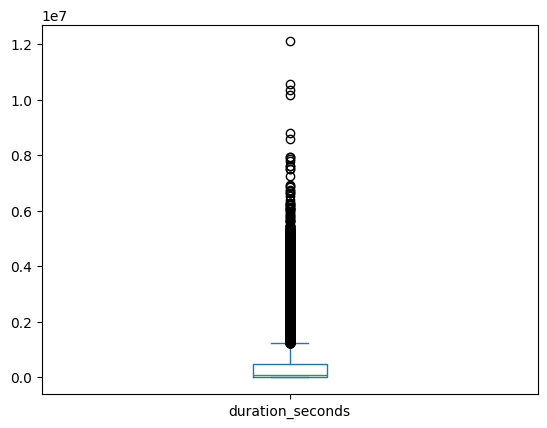

In [11]:
(start_end_event_log['duration_seconds']).plot.box()

<Axes: >

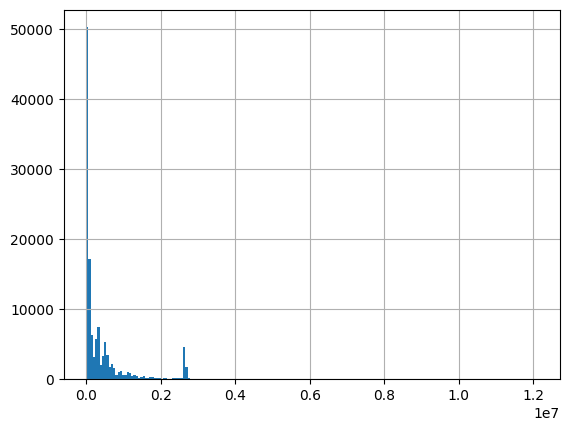

In [24]:
start_end_event_log['duration_seconds'].hist(bins=200)

In [12]:
start_end_event_log[start_end_event_log['duration_seconds'] > 3000*3600]

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds
4372663,Obtained,User_90,W_Call incomplete files,Workflow,Workitem_1015871967,start,2016-08-02 08:53:32.604000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_5,Workflow,Workitem_2124623061,ate_abort,2016-12-20 11:19:12.941000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140 days 02:25:40.337000,12104740


In [13]:
start_end_event_log[start_end_event_log['case:concept:name'] == 'Application_1283264254'].sort_values('time:timestamp_start')

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds
4372158,Obtained,User_38,W_Handle leads,Workflow,Workitem_1104763209,start,2016-07-04 10:20:10.415000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_38,Workflow,Workitem_420687419,complete,2016-07-04 10:21:41.308000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:30.893000,90
4372173,Obtained,User_38,W_Complete application,Workflow,Workitem_8871400,start,2016-07-04 10:21:41.324000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_46,Workflow,Workitem_168335046,ate_abort,2016-07-06 07:33:02.248000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 21:11:20.924000,162680
4372214,Obtained,User_46,W_Call after offers,Workflow,Workitem_1996948036,start,2016-07-06 07:33:02.258000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_121,Workflow,Workitem_574465562,ate_abort,2016-07-27 12:57:39.082000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 days 05:24:36.824000,1833876
4372251,Obtained,User_121,W_Validate application,Workflow,Workitem_1152951605,start,2016-07-27 12:57:39.089000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_121,Workflow,Workitem_71337467,complete,2016-07-27 12:59:22.602000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:43.513000,103
4372317,Obtained,User_121,W_Call incomplete files,Workflow,Workitem_1931841348,start,2016-07-27 12:59:22.622000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_112,Workflow,Workitem_1638649628,ate_abort,2016-07-28 13:28:55.868000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 00:29:33.246000,88173
4372541,Obtained,User_112,W_Validate application,Workflow,Workitem_141535530,start,2016-07-28 13:28:55.893000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_90,Workflow,Workitem_2141881838,ate_abort,2016-08-02 08:53:32.591000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 days 19:24:36.698000,415476
4372663,Obtained,User_90,W_Call incomplete files,Workflow,Workitem_1015871967,start,2016-08-02 08:53:32.604000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_5,Workflow,Workitem_2124623061,ate_abort,2016-12-20 11:19:12.941000+00:00,"Other, see explanation",New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140 days 02:25:40.337000,12104740


In [14]:
event_log[event_log['case:concept:name'] == 'Application_1283264254'].sort_values('time:timestamp')

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
570711,Created,User_1,A_Create Application,Application,Application_1283264254,complete,2016-07-04 09:34:53.112000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570712,statechange,User_1,A_Submitted,Application,ApplState_1072502574,complete,2016-07-04 09:34:53.237000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570713,Created,User_1,W_Handle leads,Workflow,Workitem_137879142,schedule,2016-07-04 09:34:53.636000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570714,Obtained,User_38,W_Handle leads,Workflow,Workitem_1104763209,start,2016-07-04 10:20:10.415000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570715,Deleted,User_38,W_Handle leads,Workflow,Workitem_420687419,complete,2016-07-04 10:21:41.308000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570716,Created,User_38,W_Complete application,Workflow,Workitem_231487459,schedule,2016-07-04 10:21:41.321000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570717,Obtained,User_38,W_Complete application,Workflow,Workitem_8871400,start,2016-07-04 10:21:41.324000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570718,statechange,User_38,A_Concept,Application,ApplState_365128361,complete,2016-07-04 10:21:41.328000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570719,Released,User_38,W_Complete application,Workflow,Workitem_1814789488,suspend,2016-07-04 10:21:47.405000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570720,Obtained,User_3,W_Complete application,Workflow,Workitem_1619472271,resume,2016-07-04 14:00:32.677000+00:00,"Other, see explanation",New credit,Application_1283264254,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Seconds in day
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')

In [16]:
start_end_event_log

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds,seconds_in_day
6776889,Obtained,User_80,W_Call after offers,Workflow,Workitem_1000013868,start,2016-10-18 08:54:52.604000+00:00,Car,New credit,Application_1804686886,6500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_27,Workflow,Workitem_1299288428,ate_abort,2016-10-25 10:47:04.561000+00:00,Car,New credit,6500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 days 01:52:11.957000,611531,32092
244649,Obtained,User_114,W_Validate application,Workflow,Workitem_1000015916,start,2016-01-19 12:58:12.261000+00:00,Car,New credit,Application_704665572,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_87,Workflow,Workitem_1506439828,complete,2016-01-20 11:37:46.361000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 22:39:34.100000,81574,46692
6253172,Obtained,User_29,W_Call incomplete files,Workflow,Workitem_1000031049,start,2016-10-03 13:50:01.644000+00:00,Car,Limit raise,Application_237359086,15500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_131,Workflow,Workitem_862714165,ate_abort,2016-10-04 07:34:19.139000+00:00,Car,Limit raise,15500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 17:44:17.495000,63857,49801
5288849,Obtained,User_27,W_Validate application,Workflow,Workitem_1000034355,start,2016-09-06 13:17:38.557000+00:00,Car,Limit raise,Application_1224319762,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_87,Workflow,Workitem_2090867811,ate_abort,2016-09-07 08:41:00.571000+00:00,Car,Limit raise,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 19:23:22.014000,69802,47858
7673911,Obtained,User_96,W_Call after offers,Workflow,Workitem_1000036756,start,2016-11-22 16:55:50.288000+00:00,Existing loan takeover,New credit,Application_729141109,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_1936087324,ate_abort,2016-11-26 06:32:54.102000+00:00,Existing loan takeover,New credit,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days 13:37:03.814000,308223,60950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834713,Obtained,User_100,W_Call incomplete files,Workflow,Workitem_99981493,start,2016-09-28 07:08:14.261000+00:00,"Other, see explanation",New credit,Application_2099910974,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_131,Workflow,Workitem_1025686019,ate_abort,2016-09-29 11:45:30.012000+00:00,"Other, see explanation",New credit,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 04:37:15.751000,103035,25694
2035725,Obtained,User_118,W_Validate application,Workflow,Workitem_999844842,start,2016-04-19 09:53:41.871000+00:00,Car,New credit,Application_2062960220,12500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_87,Workflow,Workitem_1472955941,complete,2016-04-19 11:00:53.704000+00:00,Car,New credit,12500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 01:07:11.833000,4031,35621
4832503,Obtained,User_10,W_Call after offers,Workflow,Workitem_999865530,start,2016-07-22 10:23:04.557000+00:00,Home improvement,New credit,Application_1437374008,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_126,Workflow,Workitem_1836514091,ate_abort,2016-08-03 11:46:59.789000+00:00,Home improvement,New credit,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 days 01:2

In [17]:
#start_end_event_log[(start_end_event_log['case:concept:name'] == 'Application_949646433')].sort_values('time:timestamp_start')\
#[['case:concept:name', 'concept:name', 'org:resource_start', 'lifecycle:transition_start', 'time:timestamp_start', 'org:resource_complete', 'lifecycle:transition_complete', 'time:timestamp_complete', 'duration_seconds']]

In [18]:
# Resource counts

resource_count_event_log = TransformEventLog.value_count_per_case(start_end_event_log, 'org:resource_start',
                                                                  timestamp_name = 'time:timestamp_start',
                                                                 lifecycle_col_name = 'lifecycle:transition_start')

/home/michelkunkler/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:135: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value_count_event_log = value_count_event_log.fillna(0)


In [19]:
resource_count_event_log

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds,seconds_in_day,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,User_107,User_108,User_109,User_11,User_110,User_111,User_112,User_113,User_114,User_115,User_116,User_117,User_118,User_119,User_12,User_120,User_121,User_122,User_123,User_124,User_125,User_126,User_127,User_128,User_129,User_13,User_130,User_131,User_132,User_133,User_134,User_135,User_136,User_137,User_138,User_139,User_14,User_140,User_141,User_142,User_143,User_144,User_145,User_146,User_15,User_16,User_17,User_18,User_19,User_2,User_20,User_21,User_22,User_23,User_24,User_25,User_26,User_27,User_28,User_29,User_3,User_30,User_31,User_32,User_33,User_34,User_35,User_36,User_37,User_38,User_39,User_4,User_40,User_41,User_42,User_43,User_44,User_45,User_46,User_47,User_48,User_49,User_5,User_50,User_51,User_52,User_53,User_54,User_55,User_56,User_57,User_58,User_59,User_6,User_60,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99
0,Obtained,User_80,W_Call after offers,Workflow,Workitem_1000013868,start,2016-10-18 08:54:52.604000+00:00,Car,New credit,Application_1804686886,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_27,Workflow,Workitem_1299288428,ate_abort,2016-10-25 10:47:04.561000+00:00,Car,New credit,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,7 days 01:52:11.957000,611531,32092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Obtained,User_114,W_Validate application,Workflow,Workitem_1000015916,start,2016-01-19 12:58:12.261000+00:00,Car,New credit,Application_704665572,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_87,Workflow,Workitem_1506439828,complete,2016-01-20 11:37:46.361000+00:00,Car,New credit,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 22:39:34.100000,81574,46692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Obtained,User_29,W_Call incomplete files,Workflow,Workitem_1000031049,start,2016-10-03 13:50:01.644000+00:00,Car,Limit raise,Application_237359086,15500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_131,Workflow,Workitem_862714165,ate_abort,2016-10-04 07:34:19.139000+00:00,Car,Limit raise,15500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 17:44:17.495000,63857,49801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Obtained,User_27,W_Validate application,Workflow,Workitem_1000034355,start,201

In [20]:
activity_count_event_log = TransformEventLog.value_count_per_case(resource_count_event_log, 'concept:name',
                                                                  timestamp_name = 'time:timestamp_start',
                                                                 lifecycle_col_name = 'lifecycle:transition_start' )

In [21]:
activity_count_event_log

,Action_start,org:resource_start,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,case:RequestedAmount_start,FirstWithdrawalAmount_start,NumberOfTerms_start,Accepted_start,MonthlyCost_start,Selected_start,CreditScore_start,OfferedAmount_start,OfferID_start,Action_complete,org:resource_complete,EventOrigin_complete,EventID_complete,lifecycle:transition_complete,time:timestamp_complete,case:LoanGoal_complete,case:ApplicationType_complete,case:RequestedAmount_complete,FirstWithdrawalAmount_complete,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,duration,duration_seconds,seconds_in_day,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,User_107,User_108,User_109,User_11,User_110,User_111,User_112,User_113,User_114,User_115,User_116,User_117,User_118,User_119,User_12,User_120,User_121,User_122,User_123,User_124,User_125,User_126,User_127,User_128,User_129,User_13,User_130,User_131,User_132,User_133,User_134,User_135,User_136,User_137,User_138,User_139,User_14,User_140,User_141,User_142,User_143,User_144,User_145,User_146,User_15,User_16,User_17,User_18,User_19,User_2,User_20,User_21,User_22,User_23,User_24,User_25,User_26,User_27,User_28,User_29,User_3,User_30,User_31,User_32,User_33,User_34,User_35,User_36,User_37,User_38,User_39,User_4,User_40,User_41,User_42,User_43,User_44,User_45,User_46,User_47,User_48,User_49,User_5,User_50,User_51,User_52,User_53,User_54,User_55,User_56,User_57,User_58,User_59,User_6,User_60,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99,W_Assess potential fraud,W_Call after offers,W_Call incomplete files,W_Complete application,W_Handle leads,W_Validate application
0,Obtained,User_80,W_Call after offers,Workflow,Workitem_1000013868,start,2016-10-18 08:54:52.604000+00:00,Car,New credit,Application_1804686886,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_27,Workflow,Workitem_1299288428,ate_abort,2016-10-25 10:47:04.561000+00:00,Car,New credit,6500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,7 days 01:52:11.957000,611531,32092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,Obtained,User_114,W_Validate application,Workflow,Workitem_1000015916,start,2016-01-19 12:58:12.261000+00:00,Car,New credit,Application_704665572,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_87,Workflow,Workitem_1506439828,complete,2016-01-20 11:37:46.361000+00:00,Car,New credit,15000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 22:39:34.100000,81574,46692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,Obtained,User_29,W_Call incomplete files,Workflow,Workitem_1000031049,start,2016-10-03 13:50:01.644000+00:00,Car,Limit raise,Application_237359086,15500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_131,Workflow,Workitem_862714165,ate_abort,2016-10-04 07:34:19.139000+00:00,Car,Limit raise,15500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 17:44:17.495000,63857,49801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
activity_count_event_log.to_csv('../transformed_event_logs/BPIC_2017_start_end.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
activity_count_event_log.to_pickle('../transformed_event_logs/BPIC_2017_start_end.pickle')